# <center>CLUSTERING METHOD</center>

**<p> 09011282126118 Rizqi Hairunnisa </p>**

## Terdapat 4 metode pendekatan untuk melakukan clustering, yaitu:
<img align="left" img src="ClustApproach.jpg" style="width:500px">

<img align="left" img src="3.png" style="width:500px">

Metode-metode ini memiliki kelebihan dan kekurangannya masing-masing, tetapi biasanya kita dapat memilih metode yang sesuai berdasarkan bentuk cluster:

<img align="left" img src="2.png" style="width:300px">


# <center>Clustering Pada Dataset Pengunjung Mall</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pengunjung_mall.csv')

## Deskripsi Data

In [3]:
df

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
...,...,...,...,...,...
195,196,Perempuan,35,120,79
196,197,Perempuan,45,126,28
197,198,Laki,32,126,74
198,199,Laki,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dataset diatas berisi data pengunjung mall. Dataset terdiri dari 200 baris data dan memiliki 5 variabel, yakni:
1. `IDPelanggan` merupakan nomor id dari tiap pengunjung.
2. `Kelamin` merupakan jenis kelamin dari tiap pengunjung.
3. `Usia` merupakan usia dari tiap pengunjung.
4. `Pendapatan (juta Rp)` merupakan penghasilan per-tahun dari tiap pengunjung.
5. `Rating_pegeluaran (1-100)` merupakan rating pengeluaran saat belanja dari tiap pengunjung  (1=kecil, 100=sangat besar).


## Cek Missing Value

In [5]:
df.isna().sum()

IDPelanggan                   0
Kelamin                       0
Usia                          0
Pendapatan (juta Rp)          0
Rating_pengeluaran (1-100)    0
dtype: int64

 Setelah dicek dapat dilihat bahwa tidak terdapat nilai yang kosong. Sehingga, dataset diatas dapat langsung diolah

## Slicing Dataset
Kita akan men-slicing data yang diperlukan, yakni kolom pendapatan dan kolom rating pengeluaran saja.

Slicing dilakukan karena kita hanya akan menganalisis kelompok yang terbentuk dari pendapatan konsumen dengan rating pengeluaran pengunjung.

In [5]:
df1 = df.iloc[:, [3, 4]].values

In [6]:
df2 = pd.DataFrame(df1, columns = ['Pendapatan (juta Rp)','Rating_pegeluaran (1-100)'])

In [7]:
df2

,Pendapatan (juta Rp),Rating_pegeluaran (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Dataset telah di slicing dan disimpan dengan nama `df2` dan siap untuk tahap selanjutnya.

## Tahap Clustering

### 1. Partitioning Clustering
Kami menggunakan metode K-means

In [8]:
# Mengimport library
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


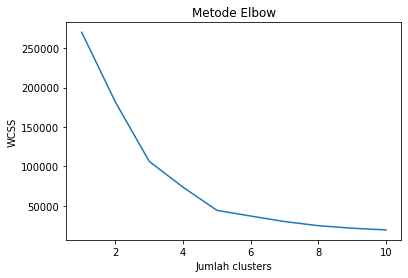

In [9]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Hasil perhitungan WCSS dari K=1 sampai K=10

Melalui gambar di atas, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 5. Oleh karena itu, kita tentukan bahwa jumlah K yang baik adalah 5.

Note: Jika pembaca berpendapat bahwa bentuk siku juga terlihat pada K=3, maka itu juga benar. Dalam kondisi seperti ini, di mana K=3 dan K=5 menunjukkan bentuk siku, kita pilih yang nilai K nya lebih besar, dalam hal ini K=5.

## K = 5

In [10]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df2)

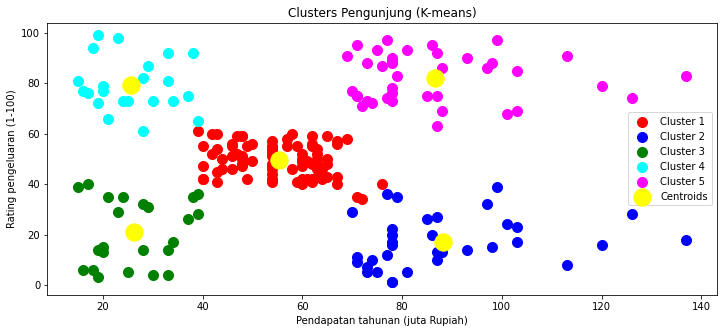

In [11]:
# Visualisasi hasil clusters
fig1 = plt.figure(figsize=(12,5))
plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df1[y_kmeans == 3, 0], df1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df1[y_kmeans == 4, 0], df1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Pengunjung (K-means)')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

Melalui gambar di atas bisa dilihat pembagian data points ke dalam kluster yang sangat rapi, di mana terlihat semua data points masuk ke dalam kluster masing-masing. Selain itu pembagian kliusternya juga baik, tampak jarak centroid yang tidak saling berdekatan.

Hasil akhirnya, yakni diperoleh 5 cluster (kelompok):
1. Cluster 1 (merah) = yang dapat diartikan sebagai kelompok middle class yang balance, yakni kelompok yang pendapatannya menengah (tidak terlalu banyak) dan pengeluarannya juga tidak terlalu banyak.
 
2. Cluster 2 (biru) = yang dapat diartikan sebagai kelompok upper class yang hemat, yakni walaupun pendapatannya tinggi. Namun, pengeluarannya sedikit.

3. Cluster 3 (hijau) = yang dapat diartikan sebagai kelompok lower class yang balance, yakni kelompok yang pendapatannya rendah dan pengeluarannya juga rendah.

4. Cluster 4 (Cyan) = yang dapat diartikan sebagai kelompok yang boros, yakni kelompok yang pendapatannya rendah. Namun, pengeluarannya sangat tinggi.

5. Cluster 5 (Ungu) = yang dapat diartikan sebagai kelompok upper class yang balance, yakni kelompok yang pendaptannya tinggi dan pengeluarannya juga tinggi.

#### Kelebihan dan kekurangan k-means

Kelebihan :
1. Mudah dilakukan saat pengimpelementasian dan di jalankan.
2. Waktu yang di butuhkan untuk melakukan pembelajaran relatif lebih cepat.
3. Sangat fleksibel, adaptasi yang mudah untuk di lakukan
4. Sangat umum penggunaannya.
5. Menggunakan prinsip yang sederhana dapat di jelaskan dalam non-statistik.

Kekurangan : 
1. Sebelum algoritma di jalankan, titik K diinisialisasikan secara random sehingga pengelompokan data yang di dapatkan bisa berbeda-beda. Namun apabila nilai yang diperoleh acak untuk penginisialisasi kurang baik maka pengelompokan yang didapatkn menjadi tidak optimal.
2. Apabila terjebak dalam kasus yang biasanya di sebut dengan curse of dimensionality. Hal ini pun akan terjadi apabila salah satu data untuk melakukan pelatihan mempunyai dimensi yang sangat banyak, sebagai contoh; jika ada data pelatihan yang terdiri dari 2 buah atribut saja maka dimensinya ada 2 dimensi pula, namun akan berbeda jika ada 20 atribut maka akan ada 20 dimensi yang di miliki. Adapun salah satu dari cara kerja algoritma cluster ini ialah untuk mencari jarak terdekat dari antara k titik dangan titik lainnya. Apabila ingin mencari jarak untuk antar titik dari 2 dimensi hal itu masih mudah untuk di lakukan, namun bagaimana dengan 20 buah dimensi hal tersebut akan menjadi lebih sulit untuk di lakukan pencarian jarak.
3. Apabila hanya ada terdapat beberapa buah titik sampel data yang ada, maka hal yang mudah untuk melakukan penghitungan dan mencari jarak titik terdekat dengan k titik yang telah di lakukan inisialisasi yang secara acak. Namun jika ada banyak titik data, misalkan satu juta data, maka perhitungan dan pencarian titik terdekat akan sangat membutuhkan waktu yang lama. Proses tersebut dapat dipercepat namun dibutuhkan sebuah struktur data yang lebih rumit seperti kD-tree atau hashing untuk melakukan proses tersebut.
4. Adanya penggunaan k buah random, tidak ada jaminan untuk menemukan kumpulan cluster yang optimal.

### 2. Hierarchical Clustering

Kami menggunakan metode Agnes (Agglomerative Nesting)

In [12]:
# Mengimport library
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 

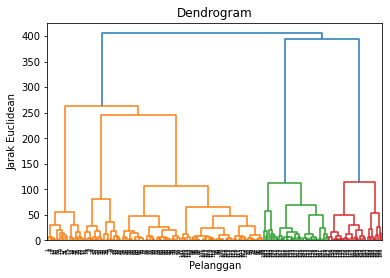

In [13]:
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
dendrogram = sch.dendrogram(sch.linkage(df1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Pelanggan')
plt.ylabel('Jarak Euclidean')
plt.show()

<img align="left" img src="4c.png" style="width:900px">

Jadi K = 5

In [14]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df1)

In [15]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


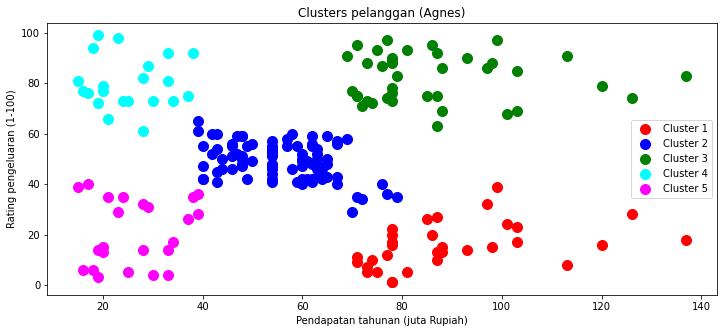

In [16]:
# Visualisasi hasil clusters
fig2 = plt.figure(figsize=(12,5))
plt.scatter(df1[y_hc == 0, 0], df1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df1[y_hc == 1, 0], df1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df1[y_hc == 2, 0], df1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df1[y_hc == 3, 0], df1[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df1[y_hc == 4, 0], df1[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters pelanggan (Agnes)')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

Melalui gambar di atas bisa dilihat pembagian data points ke dalam kluster yang sangat rapi, di mana terlihat semua data points masuk ke dalam kluster masing-masing. Selain itu pembagian kliusternya juga baik, tampak jarak yang tidak saling berdekatan. Hasilnya sangat mirip dengan K-Means walaupun ada sedikit perbedaan.

Hasil akhirnya, yakni diperoleh 5 cluster (kelompok):
1. Cluster 1 (merah) = yang dapat diartikan sebagai kelompok middle class yang balance, yakni kelompok yang pendapatannya menengah (tidak terlalu banyak) dan pengeluarannya juga tidak terlalu banyak.
 
2. Cluster 2 (biru) = yang dapat diartikan sebagai kelompok upper class yang hemat, yakni walaupun pendapatannya tinggi. Namun, pengeluarannya sedikit.

3. Cluster 3 (hijau) = yang dapat diartikan sebagai kelompok lower class yang balance, yakni kelompok yang pendapatannya rendah dan pengeluarannya juga rendah.

4. Cluster 4 (Cyan) = yang dapat diartikan sebagai kelompok yang boros, yakni kelompok yang pendapatannya rendah. Namun, pengeluarannya sangat tinggi.

5. Cluster 5 (Ungu) = yang dapat diartikan sebagai kelompok upper class yang balance, yakni kelompok yang pendaptannya tinggi dan pengeluarannya juga tinggi.

#### Kelebihan dan kekurangan Hirarchical methods

Kelebihan :
    
1. Mampu menggambarkan kedekatan antar data dengan dendrogram.
2. Cukup mudah untuk pembuatannya.
3. Dapat menentukan banyak cluster yang terbentuk setelah dendrogram terbentuk.

Kekurangan :
    
1. Tidak dapat menganalisis data kategorik secara langsung (terhambat pada penghitungan jarak yang hanya bisa dilakukan untuk data numerik, sehingga data kategorik perlu dipre-process terlebih dahulu).
2. Tidak diperuntukkan untuk menghasilkan jumlah cluster optimal yang mutlak (jumlah cluster dapat berubah-ubah tergantung level pemotongan dendrogram).
3. Sensitif terhadap data yang memiliki skala berbeda (sehingga data perlu dinormalisasi/standarisasi terlebih dahulu).
4. Sensitif terhadap outlier.
5. Cukup berat komputasinya untuk data berukuran besar.

### 3. Density-based Clustering

Kami menggunakan metode DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [17]:
# Mengimpor library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [18]:
# Mengimpor dataset
dataset = pd.read_csv('Pengunjung_mall.csv')
X_train = dataset[['Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)']]

In [19]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [20]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_train)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_train, DBS_clustering.labels_))

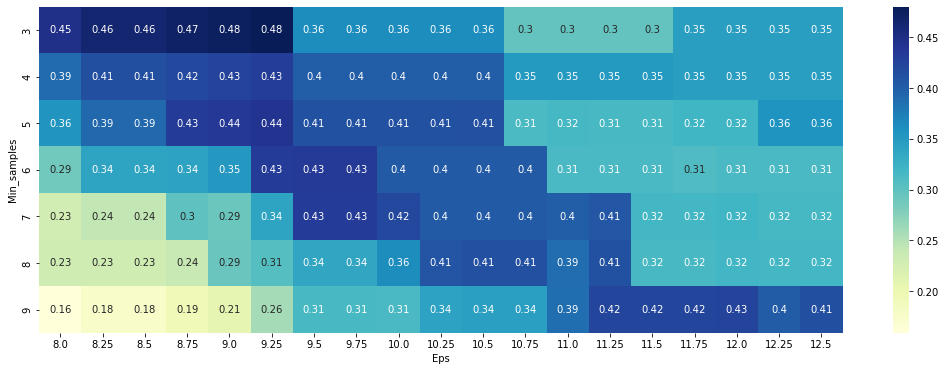

In [21]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [22]:
clustering = DBSCAN(eps=9.25, min_samples=3).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [23]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
4,89
5,33
6,28
1,18
2,12
-1,10
0,7
3,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


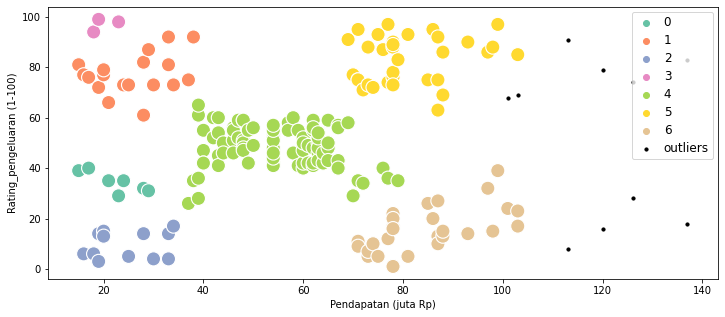

In [24]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig3, (axes) = plt.subplots(1,figsize=(12,5))

sns.scatterplot('Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes, palette='Set2', legend='full', s=200)


axes.scatter(outliers['Pendapatan (juta Rp)'], outliers['Rating_pengeluaran (1-100)'], s=10, label='outliers', c="k")

axes.legend()


plt.setp(axes.get_legend().get_texts(), fontsize='12')

plt.show()

DBSCAN menghasilkan 7 cluster dan terlihat masuk akal.

#### Kelebihan dan kekurangan DBSCAN
Kelebihan 
1. Tidak seperti K-means, DBSCAN tidak meminta kepada user untuk memasukkan nilai berapa banyak cluster yang akan dibuat.
2. DBSCAN dapat membuat cluster dengan beragam bentuk, tidak harus berbentuk circle (lingkaran).
3. DBSCAN dapat membedakan data mana yang outliers.

Kekurangan
1. Tidak cocok untuk data yang memiliki tingkat kerapatan beragam.
2. DBSCAN juga tidak cocok untuk data dengan dimensi yang besar.
3. DBSCAN sangat sensitif terhadap perubahan nilai pada parameter.

### 4. Grid-based Clustering

Kami menggunakan metode Affinity Propagation

In [25]:
# Mengimport Library
from sklearn.cluster import AffinityPropagation

In [26]:
AF = AffinityPropagation(preference=-11800).fit(X_train)

In [27]:
AF_clustered = X_train.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [28]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,21
1,22
2,83
3,39
4,35


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


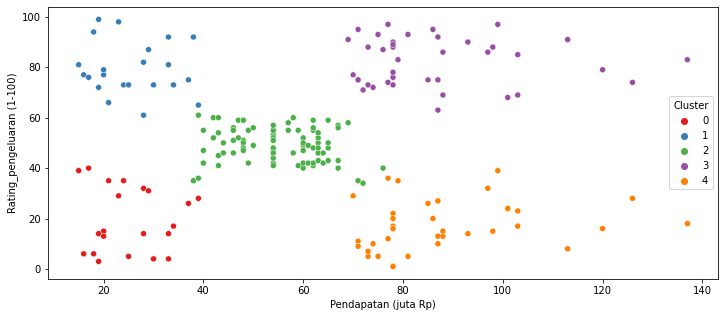

In [29]:
fig4, (ax_af) = plt.subplots(1,figsize=(12,5))


scat_1 = sns.scatterplot('Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af, palette='Set1', legend='full')



plt.setp(ax_af.get_legend().get_texts(), fontsize='10')
plt.show()


Melalui gambar di atas bisa dilihat pembagian data points ke dalam kluster yang sangat rapi, di mana terlihat semua data points masuk ke dalam kluster masing-masing. Selain itu pembagian klusternya juga baik, tampak jarak yang tidak saling berdekatan. Hasilnya sangat mirip dengan K-Means dan Agnes. 

Hasil akhirnya, yakni diperoleh 5 cluster (kelompok).

Kelebihan:

1. secara otomatis menemukan subruang dengan dimensi tertinggi sehingga terdapat kluster kepadatan tinggi di subruang tersebut 
2. tidak sensitif terhadap urutan catatan dalam input dan tidak menganggap beberapa distribusi data kanonik 3. skala secara linier dengan ukuran input dan memiliki skalabilitas yang baik karena jumlah dimensi dalam data meningkat 

Kekurangan: 
1. Keakuratan hasil pengelompokan dapat terdegradasi dengan mengorbankan kesederhanaan metode ini

# KOMPARASI HASIL

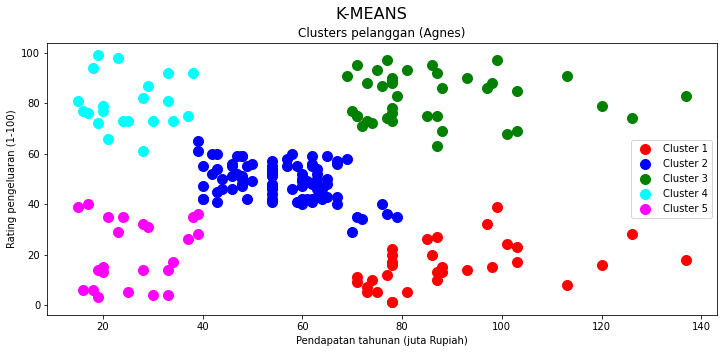

In [30]:
fig2.suptitle('K-MEANS', fontsize=16)
fig2

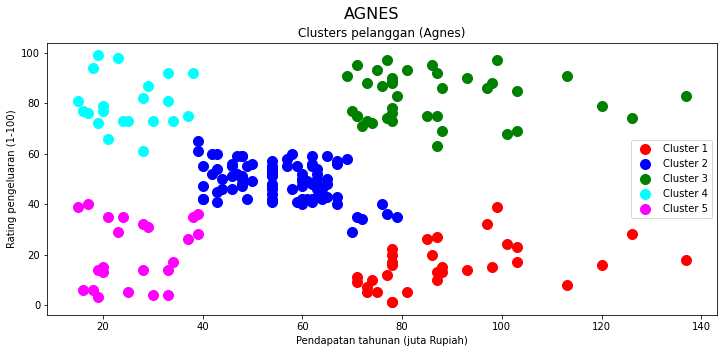

In [31]:
fig2.suptitle('AGNES', fontsize=16)
fig2

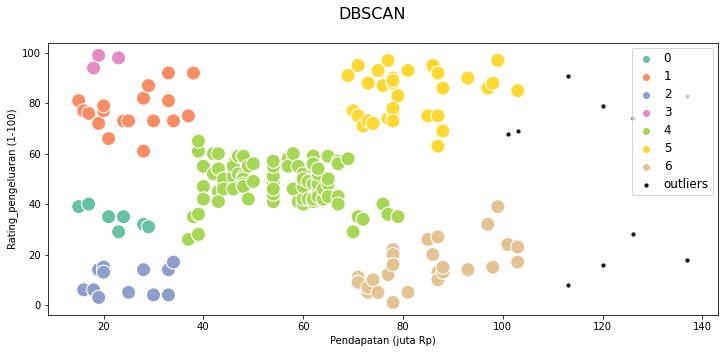

In [32]:
fig3.suptitle('DBSCAN', fontsize=16)
fig3

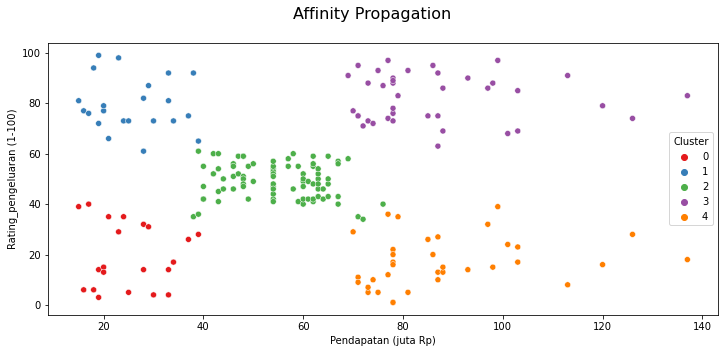

In [33]:
fig4.suptitle('Affinity Propagation', fontsize=16)
fig4

Dari perbandingan di atas, DBSAN menghasilkan cluster yang masuk akal. Kemungkinan besar karena DBCSAN mencoba mencari cluster berdasarkan kepadatan titik. Jika salah satu cluster kami kurang padat dari yang lain.
DBSCAN menghasilkan 7 cluster yang lebih spesifik. Dan juga dapat mendeteksi outliers

Sedangkan, algoritma K-Means,  Agnes dan Affinity Propagation menciptakan 5 cluster yang masuk akal, yakni:

1. Cluster 1 sebagai kelompok middle class yang balance, yakni kelompok yang pendapatannya menengah (tidak terlalu banyak) dan pengeluarannya juga tidak terlalu banyak.

2. Cluster 2 sebagai kelompok upper class yang hemat, yakni walaupun pendapatannya tinggi. Namun, pengeluarannya sedikit.

3. Cluster 3 sebagai kelompok lower class yang balance, yakni kelompok yang pendapatannya rendah dan pengeluarannya juga rendah.

4. Cluster 4 sebagai kelompok yang boros, yakni kelompok yang pendapatannya rendah. Namun, pengeluarannya sangat tinggi.

5. Cluster 5 sebagai kelompok upper class yang balance, yakni kelompok yang pendaptannya tinggi dan pengeluarannya juga tinggi.

DBSCAN menghasilkan hasil yang paling spesifik

## Metode dalam clustering

<img align="left" img src="metode.png" style="width:500px">